In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
num_of_bird_groups = len(os.listdir("/kaggle/input/100-bird-species/train"))
num_of_bird_groups

525

In [3]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("/kaggle/input/100-bird-species/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory 
len(class_names)

525

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (224, 224, 3)


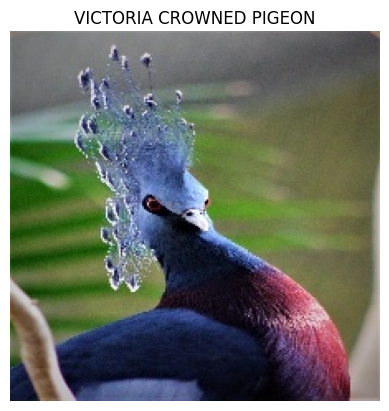

In [5]:
img = view_random_image(target_dir = "/kaggle/input/100-bird-species/train/",
                        target_class = "VICTORIA CROWNED PIGEON") # or we can write nike instead of converse to see converse examples


Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


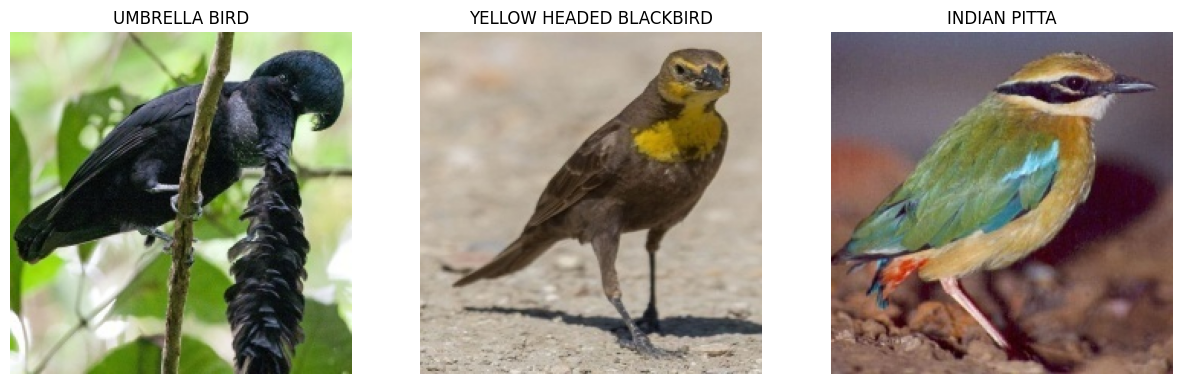

In [6]:
plt.figure(figsize = (15,7))
plt.subplot(1,3,1)
steak_image = view_random_image("/kaggle/input/100-bird-species/train/", "UMBRELLA BIRD")
plt.subplot(1,3,2)
pizza_image = view_random_image("/kaggle/input/100-bird-species/train/", "YELLOW HEADED BLACKBIRD")
plt.subplot(1,3,3)
pizza_image = view_random_image("/kaggle/input/100-bird-species/train/", "INDIAN PITTA")

In [7]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

print(torch.__version__)
print(torchvision.__version__)

2.1.2
0.16.2


In [8]:
# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

In [9]:
torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [10]:
# 1. Get pretrained weights for ViT-Base
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT # requires torchvision >= 0.13, "DEFAULT" means best available

# 2. Setup a ViT model instance with pretrained weights
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)

# 3. Freeze the base parameters
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False

# 4. Change the classifier head (set the seeds to ensure same initialization with linear head)

pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)
# pretrained_vit # uncomment for model output

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:02<00:00, 165MB/s]  


In [11]:
# Print a summary using torchinfo (uncomment for actual output)
summary(model=pretrained_vit,
        input_size=(64, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [64, 3, 224, 224]    [64, 525]            768                  Partial
├─Conv2d (conv_proj)                                         [64, 3, 224, 224]    [64, 768, 14, 14]    (590,592)            False
├─Encoder (encoder)                                          [64, 197, 768]       [64, 197, 768]       151,296              False
│    └─Dropout (dropout)                                     [64, 197, 768]       [64, 197, 768]       --                   --
│    └─Sequential (layers)                                   [64, 197, 768]       [64, 197, 768]       --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [64, 197, 768]       [64, 197, 768]       (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [64, 197, 768]       [64, 

In [12]:
train_path = "/kaggle/input/100-bird-species/train"
val_path = "/kaggle/input/100-bird-species/valid"
test_path = "/kaggle/input/100-bird-species/test" 
batch_size = 64
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),

])
train_folder = torchvision.datasets.ImageFolder(root=train_path, transform=transform)
valid_folder = torchvision.datasets.ImageFolder(root=val_path, transform=transform)
test_folder = torchvision.datasets.ImageFolder(root=test_path, transform=transform)
train_ds = DataLoader(train_folder, batch_size=batch_size,shuffle=True)
valid_ds = DataLoader(valid_folder, batch_size=batch_size)
test_ds = DataLoader(test_folder, batch_size=batch_size)

In [13]:
# Check the shape of the first image in the training dataset
first_image, first_labels = next(iter(train_ds))

first_label = first_labels[0]  # Extracting the first label from the batch
print("Shape of the first image in the training dataset:", first_image.shape)

print("The Label of the first Image:", train_ds.dataset.classes[first_label.item()])
print("The Label of the first Image:", first_labels)

Shape of the first image in the training dataset: torch.Size([64, 3, 224, 224])
The Label of the first Image: ALEXANDRINE PARAKEET
The Label of the first Image: tensor([ 11, 446, 436,  22, 393,  68, 138, 114,  56, 145, 473, 131, 328, 431,
        244, 408,  72, 152, 336, 187, 203, 143, 367,  96, 217, 406, 453,  21,
        338, 472, 424, 252, 291, 184,  92,  97,  18,   7, 101, 146, 265, 512,
        396, 105, 170, 321, 293, 513, 134, 475, 195,  42, 230, 344, 154,  74,
        444, 124,  85, 195, 436,   0, 337, 388])


Image from the training set:


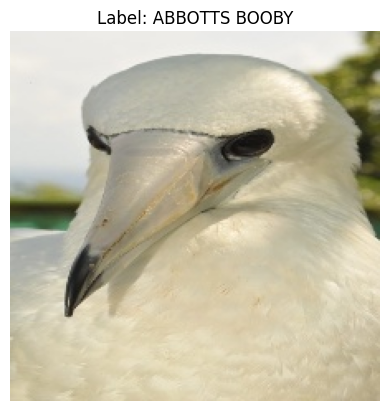

Image from the test set:


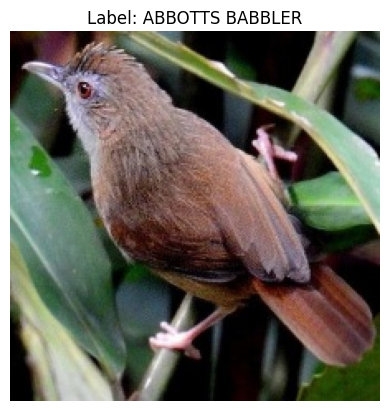

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display image with label
def display_image(dataset, index):
    image, label = dataset.dataset[index]  # Access underlying dataset from DataLoader
    plt.imshow(np.transpose(image, (1, 2, 0)))  # Transpose image from (C, H, W) to (H, W, C)
    plt.title(f"Label: {dataset.dataset.classes[label]}")  # Get class label from dataset
    plt.axis('off')  # Turn off axis
    plt.show()

# Display one image from the training set
print("Image from the training set:")
display_image(train_ds, 163)

# Display one image from the test set
print("Image from the test set:")
display_image(test_ds, 0)


In [15]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(pretrained_vit.parameters(), lr=0.001)

In [16]:
# Get automatic transforms from pretrained ViT weights
pretrained_vit_transforms = pretrained_vit_weights.transforms()
print(pretrained_vit_transforms)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [17]:
!pip install tqdm

In [18]:
from tqdm import tqdm

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(pretrained_vit.parameters(), lr=0.001)

# Define number of epochs
num_epochs = 5

# Training loop
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 10)
    
    # Set model to training mode
    pretrained_vit.train()
    
    running_train_loss = 0.0
    
    # Wrap the training loop with tqdm for progress visualization
    for inputs, labels in tqdm(train_ds, desc=f'Training - Epoch {epoch+1}/{num_epochs}', unit='batch'):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = pretrained_vit(inputs)
        
        # Calculate training loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item() * inputs.size(0)
    
    # Calculate average training loss
    epoch_train_loss = running_train_loss / len(train_ds.dataset)
    print(f'Training Loss: {epoch_train_loss:.4f}')
    
    # Set model to evaluation mode
    pretrained_vit.eval()
    
    running_valid_loss = 0.0
    correct_predictions = 0
    
    # Disable gradient calculation during validation
    with torch.no_grad():
        # Wrap the validation loop with tqdm for progress visualization
        for inputs, labels in tqdm(valid_ds, desc=f'Validation - Epoch {epoch+1}/{num_epochs}', unit='batch'):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = pretrained_vit(inputs)
            
            # Calculate validation loss
            loss = criterion(outputs, labels) 
            running_valid_loss += loss.item() * inputs.size(0)
            
            # Calculate accuracy
            _, preds = torch.max(outputs, 1)
            correct_predictions += torch.sum(preds == labels.data)
    
    # Calculate average validation loss
    epoch_valid_loss = running_valid_loss / len(valid_ds.dataset)
    print(f'Validation Loss: {epoch_valid_loss:.4f}')
    
    # Calculate validation accuracy
    epoch_accuracy = correct_predictions.double() / len(valid_ds.dataset)
    print(f'Validation Accuracy: {epoch_accuracy:.4f}')
    
print('Training complete')


Epoch 1/5
----------


Training - Epoch 1/5: 100%|██████████| 1323/1323 [17:54<00:00,  1.23batch/s]


Training Loss: 1.7147


Validation - Epoch 1/5: 100%|██████████| 42/42 [00:38<00:00,  1.09batch/s]


Validation Loss: 0.6454
Validation Accuracy: 0.8629
Epoch 2/5
----------


Training - Epoch 3/5: 100%|██████████| 1323/1323 [11:14<00:00,  1.96batch/s]


Training Loss: 0.3813


Validation - Epoch 3/5: 100%|██████████| 42/42 [00:19<00:00,  2.10batch/s]


Validation Loss: 0.3529
Validation Accuracy: 0.9166
Epoch 4/5
----------


Training - Epoch 4/5: 100%|██████████| 1323/1323 [11:14<00:00,  1.96batch/s]


Training Loss: 0.2795


Validation - Epoch 4/5: 100%|██████████| 42/42 [00:21<00:00,  1.97batch/s]


Validation Loss: 0.3191
Validation Accuracy: 0.9158
Epoch 5/5
----------


Training - Epoch 5/5: 100%|██████████| 1323/1323 [11:38<00:00,  1.89batch/s]


Training Loss: 0.2120


Validation - Epoch 5/5: 100%|██████████| 42/42 [00:20<00:00,  2.10batch/s]

Validation Loss: 0.2939
Validation Accuracy: 0.9211
Training complete


In [21]:
# Set model to evaluation mode
pretrained_vit.eval()

# Initialize variables for tracking correct predictions and total samples
correct_predictions = 0
total_samples = 0

# Disable gradient calculation during testing
with torch.no_grad():
    # Wrap the testing loop with tqdm for progress visualization
    for inputs, labels in tqdm(test_ds, desc='Testing', unit='batch'):
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = pretrained_vit(inputs)

        # Get predicted labels
        _, preds = torch.max(outputs, 1)

        # Update total samples count
        total_samples += labels.size(0)

        # Update correct predictions count
        correct_predictions += torch.sum(preds == labels.data)

# Calculate test accuracy
test_accuracy = correct_predictions.double() / total_samples
print(f'Test Accuracy: {test_accuracy:.4f}')


Testing: 100%|██████████| 42/42 [00:14<00:00,  2.83batch/s]

Test Accuracy: 0.9520


# Test The Model using Handpicked Images

In [32]:
import requests
from PIL import Image
from io import BytesIO


# Function to load image from URL or local file path
def load_image(image_path):
    if image_path.startswith('http'):
        response = requests.get(image_path)
        image = Image.open(BytesIO(response.content))
    else:
        image = Image.open(image_path)
    return image

# URL or local file path of the image you want to test
image_path = "https://th.bing.com/th/id/OIP.flDQG_JFTl56J8JKBMVzMgHaE8?rs=1&pid=ImgDetMain"  # Update with your image URL or file path

# Load the image
image = load_image(image_path)

# Preprocess the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
preprocessed_image = transform(image).unsqueeze(0)  # Add batch dimension

# Move preprocessed image to the appropriate device
preprocessed_image = preprocessed_image.to(device)

# Pass the preprocessed image through the model
with torch.no_grad():
    pretrained_vit.eval()  # Set model to evaluation mode
    outputs = pretrained_vit(preprocessed_image)

# Get the predicted class
_, predicted = torch.max(outputs, 1)
predicted_class = class_names[predicted.item()]

print("Predicted class:", predicted_class)


Predicted class: BLUE DACNIS


In [23]:
from pathlib import Path

def save_model(model: torch.nn.Module,
               target_dir: str,
               model_name: str):
    # Create target directory
    target_dir_path = Path(target_dir)
    target_dir_path.mkdir(parents=True,
                          exist_ok=True)

    # Create model save path
    assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model_name should end with '.pt' or '.pth'"
    model_save_path = target_dir_path / model_name

    # Save the model state_dict()
    print(f"[INFO] Saving model to: {model_save_path}")
    torch.save(obj=model.state_dict(),
               f=model_save_path)


In [25]:
save_model(pretrained_vit,'/kaggle/working/','birdingModel.pth')

[INFO] Saving model to: /kaggle/working/birdingModel.pth


In [29]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_vit_model_size = Path("/kaggle/working/birdingModel.pth").stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly)
print(f"Pretrained ViT feature extractor model size: {pretrained_vit_model_size} MB")

Pretrained ViT feature extractor model size: 328 MB
